In [1]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load and explore data
# 1. Import the required libraries and read the dataset
df = pd.read_csv('fifa.csv')


In [3]:
# 2. Check the first few samples, shape, info of the data
print(df.head())

       ID               Name  Age  \
0  158023           L. Messi   31   
1   20801  Cristiano Ronaldo   33   
2  190871          Neymar Jr   26   
3  193080             De Gea   27   
4  192985       K. De Bruyne   27   

                                            Photo Nationality  \
0  https://cdn.sofifa.org/players/4/19/158023.png   Argentina   
1   https://cdn.sofifa.org/players/4/19/20801.png    Portugal   
2  https://cdn.sofifa.org/players/4/19/190871.png      Brazil   
3  https://cdn.sofifa.org/players/4/19/193080.png       Spain   
4  https://cdn.sofifa.org/players/4/19/192985.png     Belgium   

                                  Flag  Overall  Potential  \
0  https://cdn.sofifa.org/flags/52.png       94         94   
1  https://cdn.sofifa.org/flags/38.png       94         94   
2  https://cdn.sofifa.org/flags/54.png       92         93   
3  https://cdn.sofifa.org/flags/45.png       91         93   
4   https://cdn.sofifa.org/flags/7.png       91         92   

             

In [4]:
print(df.shape)


(18207, 60)


In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 60 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        18207 non-null  int64  
 1   Name                      18207 non-null  object 
 2   Age                       18207 non-null  int64  
 3   Photo                     18207 non-null  object 
 4   Nationality               18207 non-null  object 
 5   Flag                      18207 non-null  object 
 6   Overall                   18207 non-null  int64  
 7   Potential                 18207 non-null  int64  
 8   Club                      17966 non-null  object 
 9   Club Logo                 18207 non-null  object 
 10  Value                     18207 non-null  object 
 11  Wage                      18207 non-null  object 
 12  Preferred Foot            18159 non-null  object 
 13  International Reputation  18159 non-null  float64
 14  Weak F

In [11]:
# Drop the specified columns
df.drop(columns=['Photo', 'Flag', 'Club Logo'], inplace=True)



KeyError: "['Photo', 'Flag', 'Club Logo'] not found in axis"

In [12]:
# Check the current columns in the DataFrame
print(df.columns)


Index(['ID', 'Name', 'Age', 'Nationality', 'Overall', 'Potential', 'Club',
       'Value', 'Wage', 'Preferred Foot', 'International Reputation',
       'Weak Foot', 'Skill Moves', 'Work Rate', 'Body Type', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'Crossing', 'Finishing', 'HeadingAccuracy',
       'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy',
       'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility',
       'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength',
       'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision',
       'Penalties', 'Composure', 'Marking', 'StandingTackle', 'SlidingTackle',
       'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes',
       'Release Clause'],
      dtype='object')


In [17]:
def convert_value_to_float(value):
    try:
        value_str = str(value)
        if value_str[-1] == 'M':
            return float(value_str[1:-1]) * 1000000
        elif value_str[-1] == 'K':
            return float(value_str[1:-1]) * 1000
        else:
            return float(value_str[1:])
    except ValueError:
        return np.nan  # Set non-convertible values to NaN

# Convert columns "Value", "Wage", and "Release Clause" to float
df['Value'] = df['Value'].apply(convert_value_to_float)
df['Wage'] = df['Wage'].apply(convert_value_to_float)
df['Release Clause'] = df['Release Clause'].apply(convert_value_to_float)

# Verify the changes
print(df[['Value', 'Wage', 'Release Clause']].dtypes)


Value             float64
Wage              float64
Release Clause    float64
dtype: object


In [18]:
# Convert the "Joined" column to datetime and extract the year
df['Joined'] = pd.to_datetime(df['Joined']).dt.year

# Verify the changes
print(df['Joined'].head())


0    2004.0
1    2018.0
2    2017.0
3    2011.0
4    2015.0
Name: Joined, dtype: float64


In [22]:
# Import datetime module
from datetime import datetime

# Define a function to handle different formats
def convert_contract_valid_until(value):
    try:
        # Attempt to convert the value to datetime
        return pd.to_datetime(value, format='%b %d, %Y')
    except ValueError:
        # If the value cannot be converted, set default day and month
        return pd.to_datetime(f'Jan 1, {value}', format='%b %d, %Y')

# Convert the "Contract Valid Until" column
df['Contract Valid Until'] = df['Contract Valid Until'].apply(convert_contract_valid_until)

# Verify the changes
print(df['Contract Valid Until'].head())


0   2021-01-01
1   2022-01-01
2   2022-01-01
3   2020-01-01
4   2023-01-01
Name: Contract Valid Until, dtype: datetime64[ns]


In [23]:
# Remove the quotation mark from the "Height" column and convert to float
df['Height'] = df['Height'].str.replace("'", "").astype(float)

# Verify the changes
print(df['Height'].head())


0     57.0
1     62.0
2     59.0
3     64.0
4    511.0
Name: Height, dtype: float64


In [24]:
# Remove the "lbs" suffix from the "Weight" column and convert to float
df['Weight'] = df['Weight'].str.replace('lbs', '').astype(float)

# Verify the changes
print(df['Weight'].head())


0    159.0
1    183.0
2    150.0
3    168.0
4    154.0
Name: Weight, dtype: float64


In [25]:
# Check for missing values
missing_percentage = df.isnull().mean() * 100
print("Percentage of missing values in each column:")
print(missing_percentage)

# Impute missing values
# Depending on the columns and their nature, we can use different imputation techniques:
# For numerical columns, we can use mean, median, or mode imputation
# For categorical columns, we can use mode imputation

# For demonstration, let's assume we'll use mean imputation for numerical columns and mode imputation for categorical columns

# Impute missing values for numerical columns with mean
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].mean())

# Impute missing values for categorical columns with mode
categorical_cols = df.select_dtypes(include=['object']).columns
df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])

# Verify if there are any missing values left
print("\nAfter imputation, checking for missing values:")
print(df.isnull().sum())


Percentage of missing values in each column:
ID                           0.000000
Name                         0.000000
Age                          0.000000
Nationality                  0.000000
Overall                      0.000000
Potential                    0.000000
Club                         1.323667
Value                        0.000000
Wage                         0.000000
Preferred Foot               0.263635
International Reputation     0.263635
Weak Foot                    0.263635
Skill Moves                  0.263635
Work Rate                    0.263635
Body Type                    0.263635
Position                     0.329544
Jersey Number                0.329544
Joined                       8.529686
Loaned From                 93.057615
Contract Valid Until         1.587302
Height                       0.263635
Weight                       0.263635
Crossing                     0.263635
Finishing                    0.263635
HeadingAccuracy              0.263635
Short

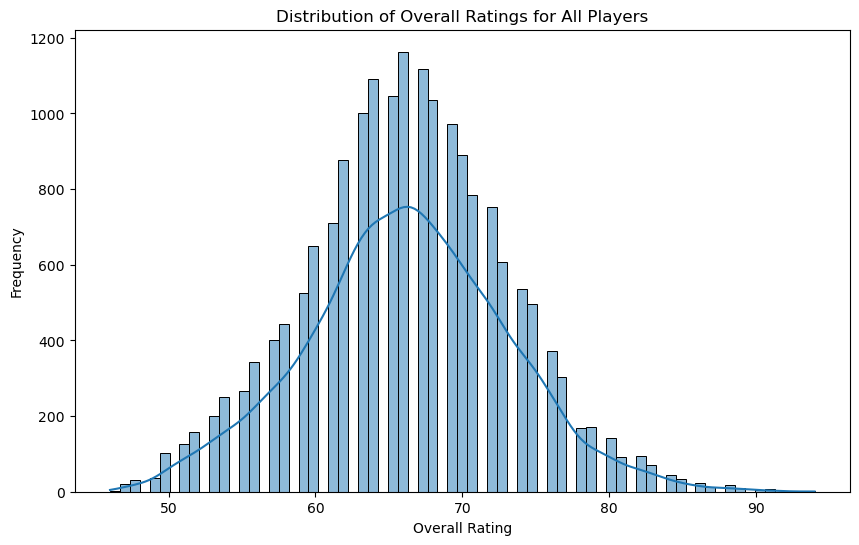

In [26]:
# Plot the distribution of Overall rating for all players
plt.figure(figsize=(10, 6))
sns.histplot(df['Overall'], kde=True)
plt.title('Distribution of Overall Ratings for All Players')
plt.xlabel('Overall Rating')
plt.ylabel('Frequency')
plt.show()


In [27]:
# Retrieve the names of top 20 players based on Overall rating
top_20_players_names = df.nlargest(20, 'Overall')['Name']
print(top_20_players_names)


0              L. Messi
1     Cristiano Ronaldo
2             Neymar Jr
3                De Gea
4          K. De Bruyne
5             E. Hazard
6             L. Modrić
7             L. Suárez
8          Sergio Ramos
9              J. Oblak
10       R. Lewandowski
11             T. Kroos
12             D. Godín
13          David Silva
14             N. Kanté
15            P. Dybala
16              H. Kane
17         A. Griezmann
18        M. ter Stegen
19          T. Courtois
Name: Name, dtype: object


In [28]:
# Generate a DataFrame including all information of the top 20 players based on Overall rating
top_20_players_info = df.nlargest(20, 'Overall')
print(top_20_players_info)


        ID               Name  Age Nationality  Overall  Potential  \
0   158023           L. Messi   31   Argentina       94         94   
1    20801  Cristiano Ronaldo   33    Portugal       94         94   
2   190871          Neymar Jr   26      Brazil       92         93   
3   193080             De Gea   27       Spain       91         93   
4   192985       K. De Bruyne   27     Belgium       91         92   
5   183277          E. Hazard   27     Belgium       91         91   
6   177003          L. Modrić   32     Croatia       91         91   
7   176580          L. Suárez   31     Uruguay       91         91   
8   155862       Sergio Ramos   32       Spain       91         91   
9   200389           J. Oblak   25    Slovenia       90         93   
10  188545     R. Lewandowski   29      Poland       90         90   
11  182521           T. Kroos   28     Germany       90         90   
12  182493           D. Godín   32     Uruguay       90         90   
13  168542        Da

In [29]:
# Calculate the average Age and Wage of the top 20 players
average_age = top_20_players_info['Age'].mean()
average_wage = top_20_players_info['Wage'].mean()

print("Average Age of the top 20 players:", average_age)
print("Average Wage of the top 20 players:", average_wage)


Average Age of the top 20 players: 28.3
Average Wage of the top 20 players: 2000.0


In [30]:
# Find the player with the highest wage among the top 20 players
player_highest_wage_index = top_20_players_info['Wage'].idxmax()
player_highest_wage_name = top_20_players_info.loc[player_highest_wage_index, 'Name']
player_highest_wage_value = top_20_players_info.loc[player_highest_wage_index, 'Wage']

print("Player with the highest wage among the top 20 players:")
print("Name:", player_highest_wage_name)
print("Wage:", player_highest_wage_value)


Player with the highest wage among the top 20 players:
Name: L. Messi
Wage: 5000.0


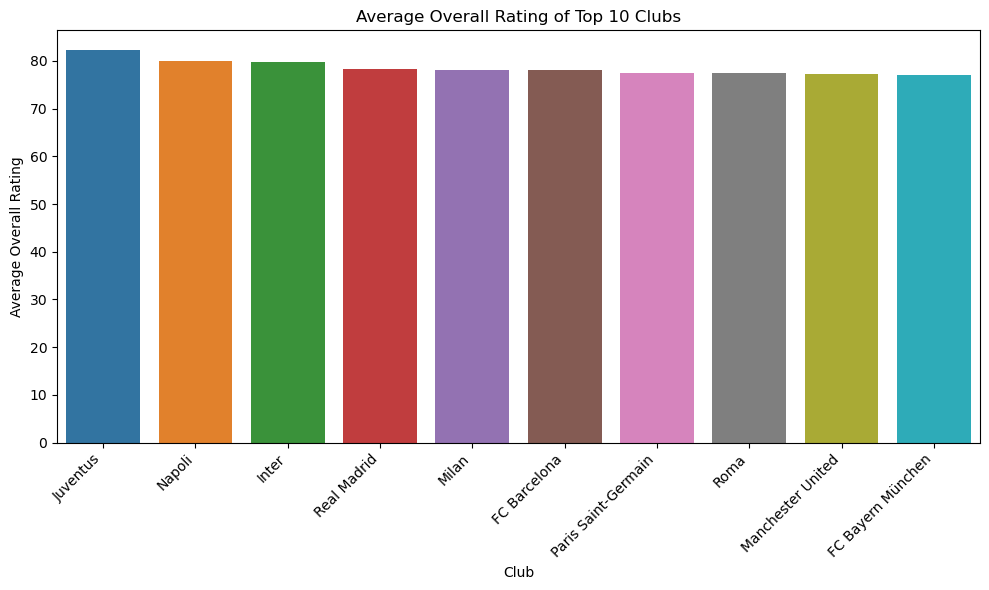

                Name                 Club    Wage  Overall
0           L. Messi         FC Barcelona  5000.0       94
1  Cristiano Ronaldo             Juventus     0.0       94
2          Neymar Jr  Paris Saint-Germain     0.0       92
3             De Gea    Manchester United     0.0       91
4       K. De Bruyne      Manchester City  5000.0       91


In [31]:
# i) Calculate the average Overall rating for each club
average_overall_rating_per_club = df.groupby('Club')['Overall'].mean().reset_index()

# ii) Select the top 10 clubs based on their average overall rating
top_10_clubs = average_overall_rating_per_club.nlargest(10, 'Overall')

# Display the average overall rating of Top 10 Clubs using a plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Club', y='Overall', data=top_10_clubs)
plt.title('Average Overall Rating of Top 10 Clubs')
plt.xlabel('Club')
plt.ylabel('Average Overall Rating')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Generate a DataFrame including "Player name", "Club Name", "Wage", and "Overall rating"
player_club_wage_overall_df = df[['Name', 'Club', 'Wage', 'Overall']]

# Display the DataFrame
print(player_club_wage_overall_df.head())


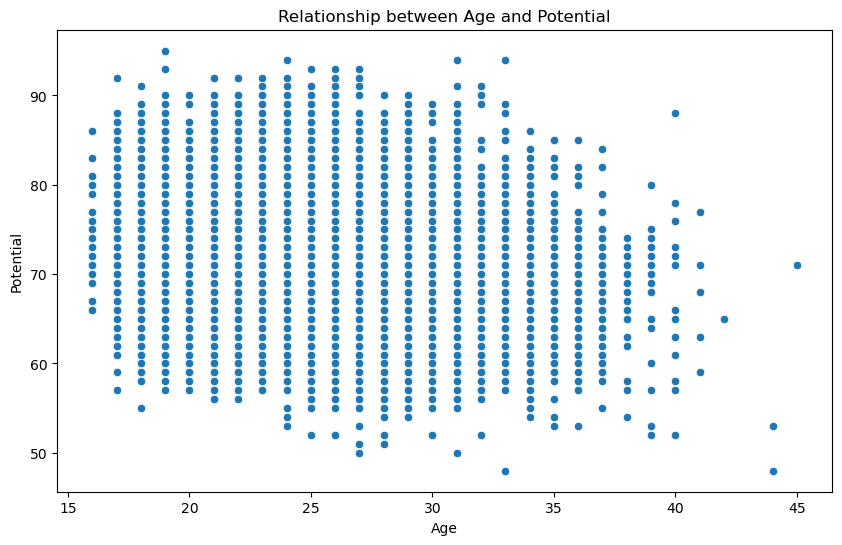

In [32]:
# Create a scatter plot to visualize the relationship between age and potential
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Potential', data=df)
plt.title('Relationship between Age and Potential')
plt.xlabel('Age')
plt.ylabel('Potential')
plt.show()


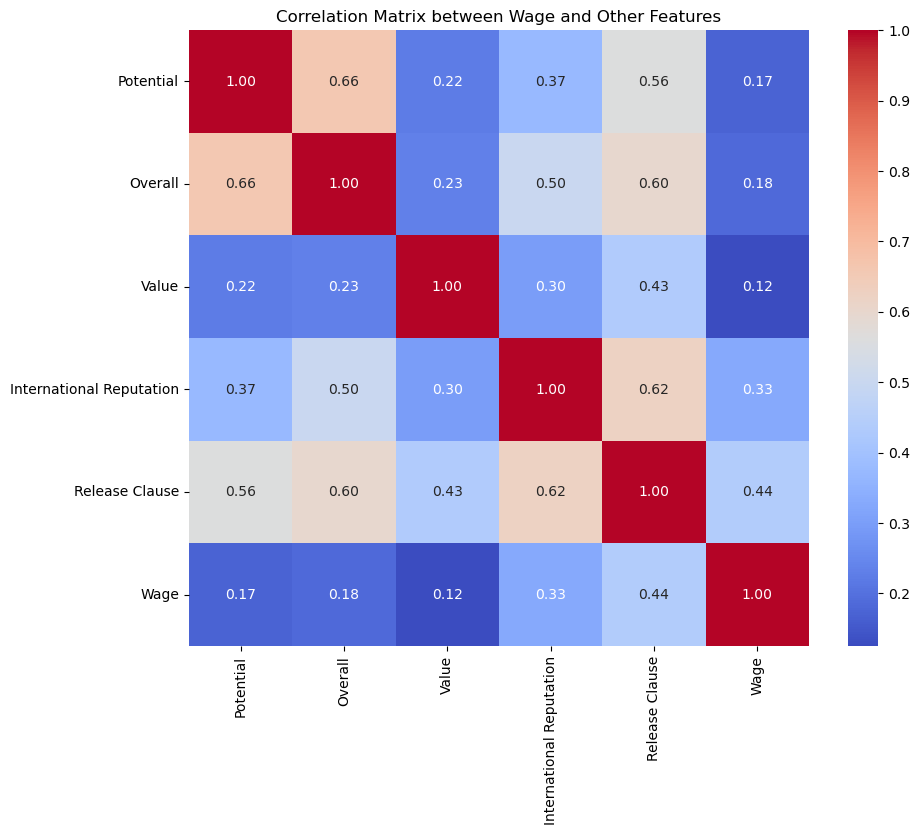

Correlation coefficients between Wage and other features:
Potential                   0.171076
Overall                     0.184080
Value                       0.124921
International Reputation    0.326680
Release Clause              0.437734
Name: Wage, dtype: float64


In [33]:
# Select the columns for correlation analysis
columns_for_correlation = ['Potential', 'Overall', 'Value', 'International Reputation', 'Release Clause']

# Calculate the correlation matrix
correlation_matrix = df[columns_for_correlation + ['Wage']].corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix between Wage and Other Features')
plt.show()

# Extract the correlation coefficients between Wage and other features
wage_correlation = correlation_matrix['Wage']

# Drop the correlation coefficient with itself
wage_correlation = wage_correlation.drop('Wage')

# Display the correlation coefficients
print("Correlation coefficients between Wage and other features:")
print(wage_correlation)


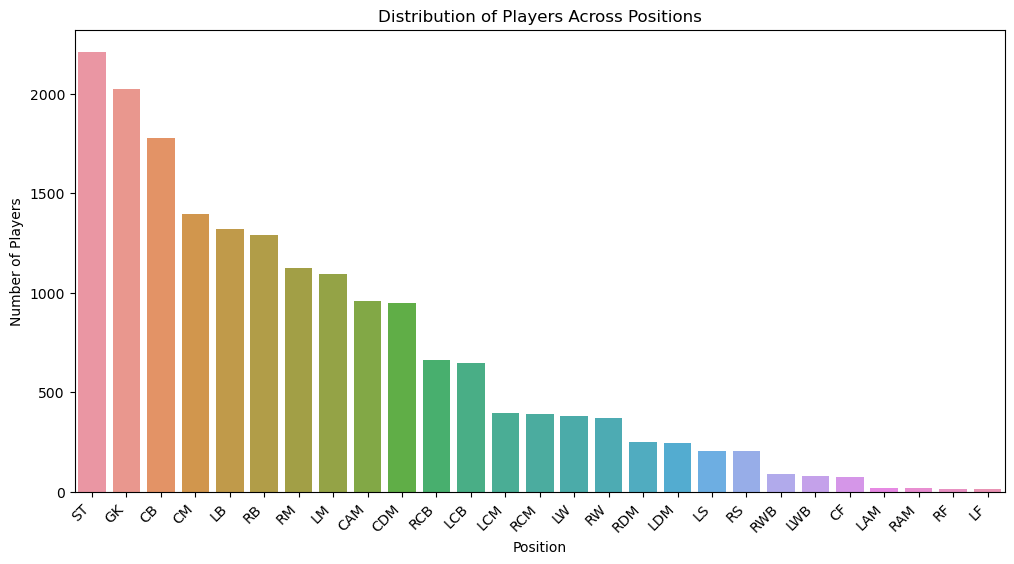

The position with the maximum number of players is 'ST' with 2212 players.
The position with the minimum number of players is 'LF' with 15 players.


In [34]:
# Count the number of players for each position
position_counts = df['Position'].value_counts()

# Find the position with the maximum number of players
max_position = position_counts.idxmax()
max_count = position_counts.max()

# Find the position with the minimum number of players
min_position = position_counts.idxmin()
min_count = position_counts.min()

# Plot the distribution of players across different positions
plt.figure(figsize=(12, 6))
sns.countplot(x='Position', data=df, order=position_counts.index)
plt.title('Distribution of Players Across Positions')
plt.xlabel('Position')
plt.ylabel('Number of Players')
plt.xticks(rotation=45, ha='right')
plt.show()

print(f"The position with the maximum number of players is '{max_position}' with {max_count} players.")
print(f"The position with the minimum number of players is '{min_position}' with {min_count} players.")


In [35]:
# Filter the DataFrame for players from the club 'Juventus' with wage greater than 200K
juventus_players_high_wage = df[(df['Club'] == 'Juventus') & (df['Wage'] > 200000)]

# Display all information of such players
print(juventus_players_high_wage)


Empty DataFrame
Columns: [ID, Name, Age, Nationality, Overall, Potential, Club, Value, Wage, Preferred Foot, International Reputation, Weak Foot, Skill Moves, Work Rate, Body Type, Position, Jersey Number, Joined, Loaned From, Contract Valid Until, Height, Weight, Crossing, Finishing, HeadingAccuracy, ShortPassing, Volleys, Dribbling, Curve, FKAccuracy, LongPassing, BallControl, Acceleration, SprintSpeed, Agility, Reactions, Balance, ShotPower, Jumping, Stamina, Strength, LongShots, Aggression, Interceptions, Positioning, Vision, Penalties, Composure, Marking, StandingTackle, SlidingTackle, GKDiving, GKHandling, GKKicking, GKPositioning, GKReflexes, Release Clause]
Index: []

[0 rows x 57 columns]


In [36]:
# Define a function to select top 5 players by Overall rating
def top_5_players(group):
    return group.nlargest(5, 'Overall')

# Apply the function to each group defined by unique positions
top_5_players_by_position = df.groupby('Position', as_index=False).apply(top_5_players)

# Reset the index to obtain a regular DataFrame
top_5_players_by_position = top_5_players_by_position.reset_index(drop=True)

# Display the DataFrame
print(top_5_players_by_position)


         ID               Name  Age Nationality  Overall  Potential  \
0    194765       A. Griezmann   27      France       89         90   
1    190460         C. Eriksen   26     Denmark       88         91   
2    201942    Roberto Firmino   26      Brazil       86         87   
3    189596          T. Müller   28     Germany       86         86   
4    176635            M. Özil   29     Germany       86         86   
..      ...                ...  ...         ...      ...        ...   
130   20801  Cristiano Ronaldo   33    Portugal       94         94   
131  188545     R. Lewandowski   29      Poland       90         90   
132  202126            H. Kane   24     England       89         91   
133  153079          S. Agüero   30   Argentina       89         89   
134  173731            G. Bale   28       Wales       88         88   

                  Club     Value    Wage Preferred Foot  ...  Composure  \
0      Atlético Madrid       0.0  5000.0           Left  ...       87.0 

In [37]:
# Calculate the average wage for the top 5 players in every position
average_wage_by_position = top_5_players_by_position.groupby('Position')['Wage'].mean()

# Display the average wage for each position
print("Average wage for the top 5 players in every position:")
print(average_wage_by_position)


Average wage for the top 5 players in every position:
Position
CAM    3000.0
CB     1000.0
CDM    3000.0
CF        0.0
CM     2000.0
GK        0.0
LAM    1000.0
LB     1000.0
LCB    4000.0
LCM    4000.0
LDM    2000.0
LF        0.0
LM     3000.0
LS     1000.0
LW     3000.0
LWB       0.0
RAM       0.0
RB     3000.0
RCB    1000.0
RCM    1000.0
RDM    1000.0
RF     2000.0
RM     2000.0
RS     2000.0
RW     3000.0
RWB       0.0
ST     1000.0
Name: Wage, dtype: float64
